<a href="https://colab.research.google.com/github/DavorJordacevic/TensorFlow-Keras-Neural-Networks/blob/master/Convolutional_Neural_Network_in_tf_keras_%E2%80%93_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


# Solving a digits classification problem- Convolutional neural network with tf.keras

Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano.

In [0]:
import numpy as np
import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from sklearn.metrics import confusion_matrix

np.random.seed(0)

# 1. Load the digit dataset

### 1.1 Spliting data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


### 1.2 Checking the shape of the input data

In [0]:
print('x_train:\t{}' .format(X_train.shape))
print('y_train:\t{}' .format(y_train.shape))
print('x_test:\t\t{}'.format(X_test.shape))
print('y_test:\t\t{}'.format(y_test.shape))

x_train:	(60000, 28, 28)
y_train:	(60000,)
x_test:		(10000, 28, 28)
y_test:		(10000,)


### 1.3 Plot first 64 digits

Now we can plot some digits to see how they look.

digits.target contain real value for each image in digits.images

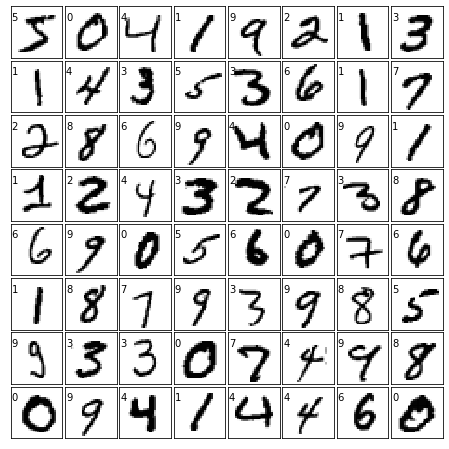

In [0]:
# set up the figure
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 28x28 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(y_train[i]))

In [0]:
img_rows, img_cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255.
X_test /= 255.

print('X_train:\t{}' .format(X_train.shape),' -reshaped')
print('X_test: \t{}' .format(X_test.shape),' -reshaped')

X_train:	(60000, 28, 28, 1)  -reshaped
X_test: 	(10000, 28, 28, 1)  -reshaped


### 1.4 One Hot Encoding

Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric.

This means that categorical data must be converted to a numerical form.

In [0]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

# 2. Implementing a Neural Network

### 2.1 Hyperparameters

In [0]:
# Hyperparameters
training_epochs = 5 # Total number of training epochs
learning_rate = 0.003 # The learning rate

### 2.2 Creating a model

**Conv2D**  - This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.

**BatchNormalization** - Normalize the activations of the previous layer at each batch, i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1.

**Max pooling** is a sample-based discretization process. The objective is to down-sample an input representation (image, hidden-layer output matrix, etc.), reducing its dimensionality and allowing for assumptions to be made about features contained in the sub-regions binned.

**Dropout**  is a technique used to improve over-fit on neural networks, you should use Dropout along with other techniques like L2 Regularization. Basically during training some of neurons on a particular layer will be deactivated. This improve generalization because force your layer to learn with different neurons the same "concept".
During the prediction phase the dropout is deactivated.

**Flatten**  - Flattens the input. Does not affect the batch size.

To make this work in keras we need to compile a model. An important choice to make is the loss function. We use the **categorical_crossentropy** loss because it measures the probability error in discrete classification tasks in which the classes are mutually exclusive (each entry is in exactly one class).

**Adadelta** is a more robust extension of Adagrad that adapts learning rates based on a moving window of gradient updates, instead of accumulating all past gradients. This way, Adadelta continues learning even when many updates have been done.

In [0]:
# create a model
def create_model():
  model = Sequential()

  model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(32, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(BatchNormalization())
  
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  model.compile(optimizer=Adam(learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

model = create_model()
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 5, 5, 32)          128       
_________________________________________________________________
flatten_6 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)              

### 2.3 Train the model

Let's trains the model for a given number of epochs.

In [0]:
results = model.fit(
 X_train, y_train,
 epochs= training_epochs,
 batch_size = 32,
 validation_data = (X_test, y_test),
 verbose = 2
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 - 12s - loss: 0.1003 - accuracy: 0.9697 - val_loss: 0.0842 - val_accuracy: 0.9758
Epoch 2/5
60000/60000 - 11s - loss: 0.0472 - accuracy: 0.9859 - val_loss: 0.0511 - val_accuracy: 0.9840
Epoch 3/5
60000/60000 - 11s - loss: 0.0326 - accuracy: 0.9898 - val_loss: 0.0480 - val_accuracy: 0.9857
Epoch 4/5
60000/60000 - 11s - loss: 0.0287 - accuracy: 0.9916 - val_loss: 0.0461 - val_accuracy: 0.9860
Epoch 5/5
60000/60000 - 11s - loss: 0.0222 - accuracy: 0.9932 - val_loss: 0.0499 - val_accuracy: 0.9869


### 2.4 Test the model

Model can generate output predictions for the input samples.

In [0]:
prediction_values = model.predict_classes(X_test)

### 2.5 Accuracy

Test-Accuracy :

In [0]:
print("Test-Accuracy:","%.2f%%" % (np.mean(results.history["val_accuracy"])*100))

Test-Accuracy: 98.37%


### 2.6 Evaluate the model to see the accuracy

Now we can check the accuracy of our model

In [0]:
print("Evaluating on training set...")
(loss, accuracy) = model.evaluate(X_train,y_train, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))


print("Evaluating on testing set...")
(loss, accuracy) = model.evaluate(X_test, y_test, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Evaluating on training set...
loss=0.0149, accuracy: 99.5183%
Evaluating on testing set...
loss=0.0499, accuracy: 98.6900%


### 2.7 Summarize history for accuracy and loss


Maximum Loss : 0.1003
Minimum Loss : 0.0222
Loss difference : 0.0781


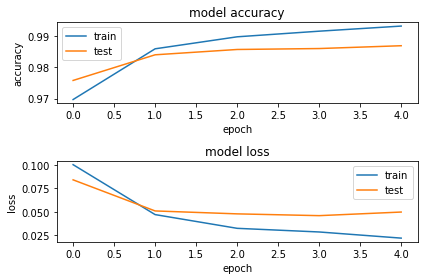

In [0]:
# summarize history for accuracy
plt.subplot(211)
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])

# summarize history for loss
plt.subplot(212)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.tight_layout()

max_loss = np.max(results.history['loss'])
min_loss = np.min(results.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss))
print("Minimum Loss : {:.4f}".format(min_loss))
print("Loss difference : {:.4f}".format((max_loss - min_loss)))

### 2.8 Confusion matrix

Text(0.5, 15.0, 'Predicted')

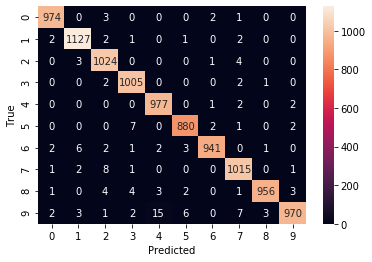

In [0]:
Y_true = np.argmax(y_test,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, prediction_values) 
sns.heatmap(confusion_mtx, annot=True, fmt="d")
plt.ylabel('True')
plt.xlabel('Predicted')

### 2.8 Save a model to JSON and HDF5

In [0]:
# save weights to HDF5
model.save_weights("CNN model_tensorflow.keras_digits_recoginition.h5")

# 3. Visualization

### 3.3 Display the test set and predictions

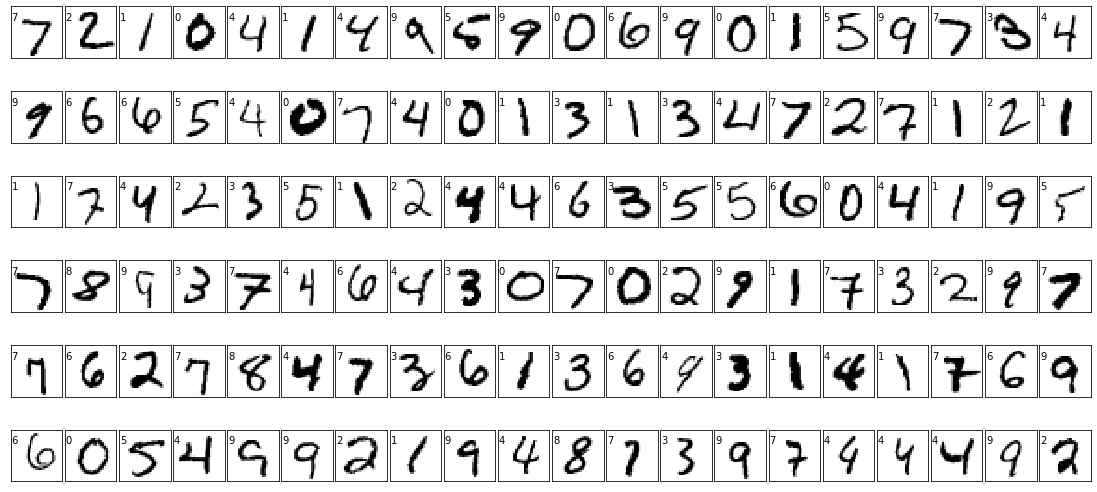

In [0]:
# set up the figure
fig = plt.figure(figsize=(15, 7))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(120):
    ax = fig.add_subplot(6, 20, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i,:].reshape((28,28)),cmap=plt.cm.gray_r, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(prediction_values[i]))